## Parameter Sweep

Say we want to run more than one simulation, each with a set of small differences compared to a base configuration.  Generically, this concept is accommodated by the `Builder` class, which is basically a generator that returns a list of functions to apply to the base configuration to make each unique simulation.

The specific example below will generate six simulations for all combinations of 3 random seeds (driven by the Run_Number parameter) and 3 different values of the x_Temporary_Larval_Habitat parameter which scales the habitat size for all mosquito populations.

Note also that we can pass in configuration parameter overrides directly to the `DTKConfigBuilder` constructor.

In [68]:
from dtk.utils.core.DTKConfigBuilder import DTKConfigBuilder
from dtk.utils.builders.sweep import GenericSweepBuilder
from dtk.vector.study_sites import configure_site

# Define the experiment name
exp_name  = 'SweepDemo1'

# Create the sweeps 
builder   = GenericSweepBuilder.from_dict({'Run_Number': range(3),
                                           'x_Temporary_Larval_Habitat' : [0.01,0.05,0.07]})

# Initialize the config builder with the default for 'MALARIA_SIM' simulation and some overrides like the 
# population scaled to 10% and the 5 years duration.
cb = DTKConfigBuilder.from_defaults('MALARIA_SIM', 
                                    Base_Population_Scale_Factor=0.1,
                                    Simulation_Duration=365*5)

# Configure the Namawala site (setting up some parameters specific to Namawala like demographics, climate, etc.)
configure_site(cb, 'Namawala')

# Create the arguments to run the simulations: the config builder, experiment builder and a name
run_sim_args =  { 'config_builder' : cb,
                  'exp_name'       : exp_name,
                  'exp_builder'    : builder }

As in the previous example, since we're not using the command-line utility here, we'll rely on a few helper functions, which are defined in the `utils.py` module.

In [69]:
from utils import *

sm = get_sim_manager()

In [70]:
run_demo(sm, run_sim_args)

{'exp_id': '2016_02_17_10_12_24_741000',
 'exp_name': 'SweepDemo1',
 'location': 'LOCAL',
 'sim_root': 'C:\\Users\\braybaud\\PycharmProjects\\dtk-tools\\examples\\notebooks\\simulations',
 'sim_type': 'MALARIA_SIM',
 'sims': {'2016_02_17_10_12_24_754000': {'Run_Number': 0,
   'jobId': 4576,
   'x_Temporary_Larval_Habitat': 0.01},
  '2016_02_17_10_12_24_773000': {'Run_Number': 1,
   'jobId': 1120,
   'x_Temporary_Larval_Habitat': 0.01},
  '2016_02_17_10_12_24_790000': {'Run_Number': 2,
   'jobId': 3384,
   'x_Temporary_Larval_Habitat': 0.01},
  '2016_02_17_10_12_24_808000': {'Run_Number': 0,
   'jobId': 3752,
   'x_Temporary_Larval_Habitat': 0.05},
  '2016_02_17_10_12_24_829000': {'Run_Number': 1,
   'jobId': 1924,
   'x_Temporary_Larval_Habitat': 0.05},
  '2016_02_17_10_12_24_848000': {'Run_Number': 2,
   'jobId': 7568,
   'x_Temporary_Larval_Habitat': 0.05},
  '2016_02_17_10_12_24_867000': {'Run_Number': 0,
   'jobId': 952,
   'x_Temporary_Larval_Habitat': 0.07},
  '2016_02_17_10_12_2

The output above should show the metadata for each of the simulations in our sweep.  If we monitor our simulations, we may note they take a bit longer as we are now running the full malaria model rather than the simplified vector model (with generic within-host disease dynamics).

In [71]:
monitor_status(sm)

Job states:
{
    "952": "Running (11% complete)", 
    "1120": "Running (11% complete)", 
    "1924": "Running (11% complete)", 
    "3384": "Running (16% complete)", 
    "3752": "Running (11% complete)", 
    "4576": "Running (12% complete)", 
    "6828": "Running (10% complete)", 
    "7568": "Running (14% complete)", 
    "8212": "Running (8% complete)"
}
{'Running': 9}
Job states:
{
    "952": "Running (25% complete)", 
    "1120": "Running (27% complete)", 
    "1924": "Running (25% complete)", 
    "3384": "Running (35% complete)", 
    "3752": "Running (25% complete)", 
    "4576": "Running (28% complete)", 
    "6828": "Running (25% complete)", 
    "7568": "Running (27% complete)", 
    "8212": "Running (22% complete)"
}
{'Running': 9}
Job states:
{
    "952": "Running (35% complete)", 
    "1120": "Running (38% complete)", 
    "1924": "Running (36% complete)", 
    "3384": "Running (48% complete)", 
    "3752": "Running (35% complete)", 
    "4576": "Running (39% complete)

Finally, let's define the analyzers in a similar fashion as in the previous tutorial.  Note that now we have multiple simulations, so the `group_by_name` function will draw one line per simulation colored by group (i.e. x_Temporary_Larval_Habitat) and average across the different seeds.

In [79]:
from dtk.utils.analyzers import sample_selection, group_by_name, plot_grouped_lines, \
                                TimeseriesAnalyzer, VectorSpeciesAnalyzer

analyzers = [ TimeseriesAnalyzer(
                filename='InsetChart.json',
                channels=['Rainfall', 'Adult Vectors', 'Daily EIR', 'Infected'],
                group_function=group_by_name('x_Temporary_Larval_Habitat')
                ),
              VectorSpeciesAnalyzer(
                filename='VectorSpeciesReport.json',
                channels=['Adult Vectors', 'Daily EIR'],
                group_function=group_by_name('x_Temporary_Larval_Habitat')
                )
            ]

(0, '2016_02_17_10_12_24_773000')
(1, '2016_02_17_10_12_24_887000')
(2, '2016_02_17_10_12_24_754000')
(3, '2016_02_17_10_12_24_808000')
(4, '2016_02_17_10_12_24_829000')
(5, '2016_02_17_10_12_24_906000')
(6, '2016_02_17_10_12_24_790000')
(7, '2016_02_17_10_12_24_867000')
(8, '2016_02_17_10_12_24_848000')


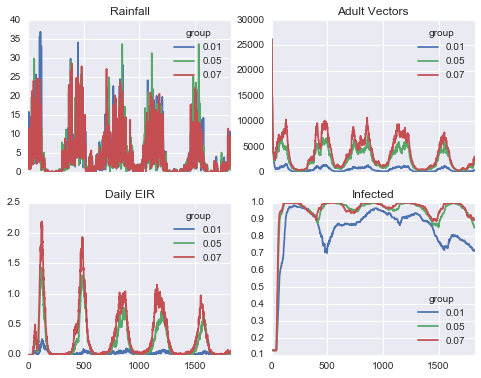

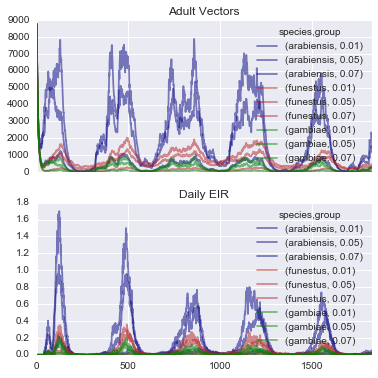

In [80]:
%matplotlib inline
draw_plots(sm, analyzers)